# Opening a grocery store in tornto

**Introduction**

Toronto is a large city with a population of about 6 million in the greater Toronto area and about 3 million in the Toronto city area [1]. This population will continue to grow and there is a room for opening new stores to fulfill this continues growth. However, to gain competitive advantage companies should consider the neighborhood and analyze which has the greatest potential. Factors to be analyzed area, population in the neighborhood, competition in the neighborhood, and potential to open more stores in similar areas. 

**Business Problem**

A grocery store company named BestGrocery want to open their first store in Toronto. They want to gain first entrant advantage by being the first grocery store company in the neighborhood. This advantage is going to be used to leverage themselves into similar neighborhoods and gain a large total market share fast. However, they are not sure where their first, and most important, store should be opened. Therefore they want to do analysis and base their decision on that analysis.
Aspects to consider are population size, average income, and buying power. 


**Data**

The data we need is data on the neighbourhoods and what stores they have and the population in each neighborhood. The neighborhood data can be accessed through the Foursquare API, however the population data is hard to access in a good format. Therefore, we will get the data by scraping information from wikipedia. 

The data from the Foursquare  API would consist of information about nearby venues and contains the:
- Venue name
- Venue category 
- Venue location

The data that can be scraped contains:
- Neighborhood
- Population
- Average income
- Latitude 
- Longitude 

We want to combine this data into a single, cleaned, and formatted data frame such that we can explore the dataframe.
**bold text**

# Importing libraries

In [1]:
!pip install geocoder
!pip install geopy


In [2]:
#importing all the necessary libraries 

from bs4 import BeautifulSoup as bsoup
from urllib.request import urlopen as uReq
import requests
import lxml
import pandas as pd
from pandas import DataFrame
import numpy as np
import requests # library to handle requests
import json # library to handle JSON files
import bs4 as bs
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt

import geocoder

from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Data gathering 

## Importing neighborhood profiles throguh web scraping

---




In [0]:
#Wikipedia page with the demographic information about the neighborhoods in Toronto
url= 'https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'


In [0]:

#read the url
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')


In [5]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Demographics of Toronto neighbourhoods - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demographics_of_Toronto_neighbourhoods","wgTitle":"Demographics of Toronto neighbourhoods","wgCurRevisionId":810941245,"wgRevisionId":810941245,"wgArticleId":38958143,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with obsolete information from April 2013","All Wikipedia articles in need of updating","Neighbourhoods in Toronto"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","

In [0]:

skip_table = 1
table = soup.find_all('table')[skip_table]
table_rows = table.find_all('tr')

data_scraping = []
for tr in table_rows:
    #print (tr)
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        data_scraping.append(row)

In [7]:
#set the names of the colummns 
df1 = pd.DataFrame(data_scraping, columns=["Neighbourhood", "FM", "Census", "Population", "Land Area", "Density", "Population %", "Income", "Commuting", "Renters", "2nd Language", "2nd Language %"])

# clean up the data and dropping unwanted columns
df1 = df1[df1.Neighbourhood != 'Toronto CMA Average']
df1 = df1.drop('FM', 1)
df1 = df1.drop('Census', 1)
df1 = df1.drop('Renters', 1)
df1 = df1.drop('Commuting', 1)
df1['Population'] = df1['Population'].str.replace(',','')
df1['Population'] = df1['Population'].apply(pd.to_numeric)
#print (df1.dtypes)

# display sample data
df1.head(10)


,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %
1,Agincourt,44577,12.45,3580,4.6,"25,750",Cantonese (19.3%),19.3% Cantonese
2,Alderwood,11656,4.94,2360,-4.0,"35,239",Polish (6.2%),06.2% Polish
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",Cantonese (17.9%),17.9% Cantonese
4,Allenby,2513,0.58,4333,-1.0,"245,592",Russian (1.4%),01.4% Russian
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",Spanish (6.1%),06.1% Spanish
6,Armour Heights,4384,2.29,1914,2.0,"116,651",Russian (9.4%),09.4% Russian
7,Banbury,6641,2.72,2442,5.0,"92,319",Unspecified Chinese (5.1%),05.1% Unspecified Chinese
8,Bathurst Manor,14945,4.69,3187,12.3,"34,169",Russian (9.5%),09.5% Russian
9,Bay Street Corridor,4787,0.11,"43,518",3.0,"40,598",Mandarin (9.6%),09.6% Mandarin
10,Bayview Village,12280,4.14,"2,966",41.6,"46,752",Cantonese (8.4%),08.4% Cantonese


In [8]:
#One row has to be cleaned 
print(df1.loc[[64]]['Income'])

64    45,792Canada 2011 Census[1]
Name: Income, dtype: object


In [9]:
#change the value in that cell
df1.ix[64, 'Income'] = str('45,792')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
#make the income float so that we can calculate with it
df1['Income'] = df1['Income'].str.replace(',', '').astype(float)



Now we define "buying power" as the income timuliplied with the income, this would be equalt to the sum of all  income in that neighborhood.

In [0]:
df1['Buying Power'] = df1['Income']*df1['Population']

In [85]:
df1.head()

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude
1,Agincourt,44577,12.45,3580,4.6,25750.0,Cantonese (19.3%),19.3% Cantonese,1.147858e+09,43.788,-79.2839
2,Alderwood,11656,4.94,2360,-4.0,35239.0,Polish (6.2%),06.2% Polish,4.107458e+08,43.6035,-79.5464
3,Alexandra Park,4355,0.32,"13,609",0.0,19687.0,Cantonese (17.9%),17.9% Cantonese,8.573688e+07,43.6498,-79.4015
4,Allenby,2513,0.58,4333,-1.0,245592.0,Russian (1.4%),01.4% Russian,6.171727e+08,43.7077,-79.4127
5,Amesbury,17318,3.51,"4,934",1.1,27546.0,Spanish (6.1%),06.1% Spanish,4.770416e+08,43.7011,-79.481


**Methodology**


Through webscarping we were able to get scrape the data for the neighborhoods in Toronto and the we scraped the Demographics of Toronto wikipedia page. This information is crucial to determine which neighborhood to target as it contains the population, and the income in that neighborhood. We used the library geocoder to gain acces about the location of each neighborhood. This data also contained information about the ethnicity of the neighborhood and the population growth in that neighborhood. By using this data we add another feature, the "buying power" of the neighborhoods. The buying power is the sum of all the income over the population in that neighborhood.
To get access to data about the neighborhood, such as what venues they have, we used the foursquare API which contains all the necessary information, including venue name, location, and category.
To solve this problem we used kmeans, an unsupervised machine learning algorithm. We set the number of clusters to 5 and then used the nearby venues as the input for this model. This would result in clusters that are grouped by the similarity of the neighborhoods venues, which type of restaurants are their, are their grocery stores, etc.



## Plots 

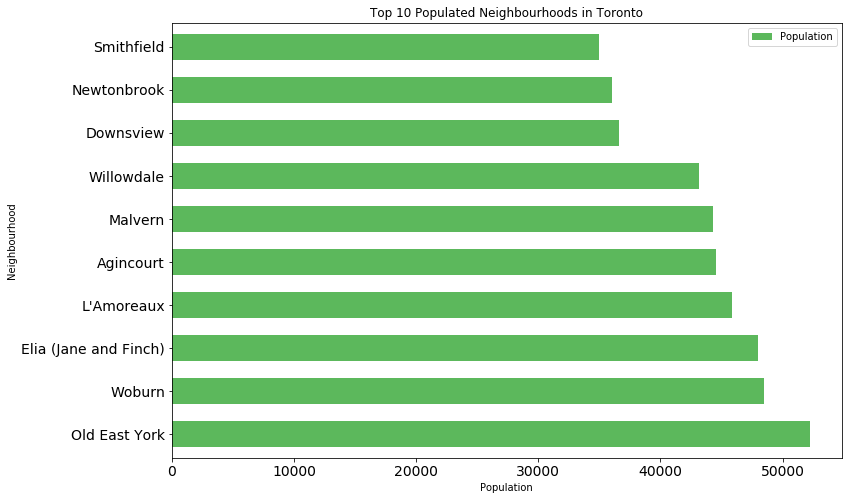

In [86]:
population_chart = df1[['Neighbourhood', 'Population']].copy().sort_values('Population', ascending=False)
top_chart = population_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Population') # add y-label to the plot
plt.title('Top 10 Populated Neighbourhoods in Toronto') # add title to the plot

plt.show()

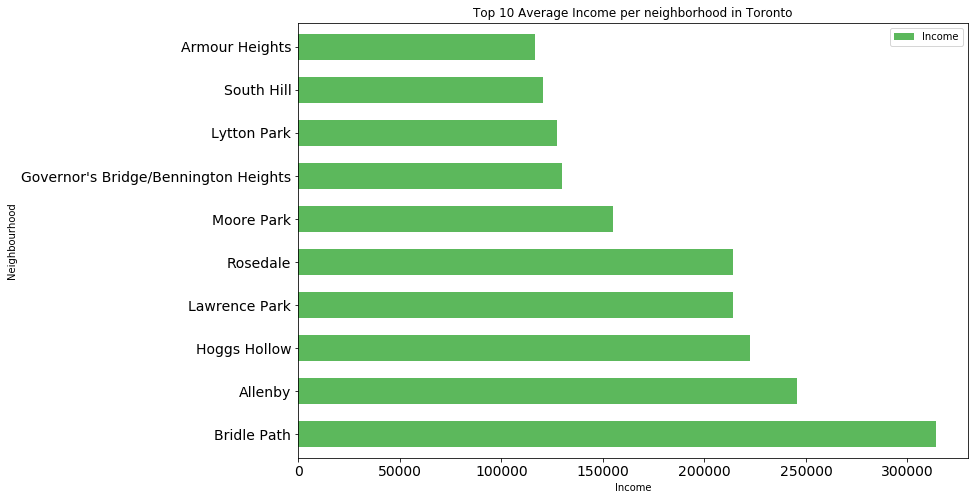

In [87]:
income_chart = df1[['Neighbourhood', 'Income']].copy().sort_values('Income', ascending=False)
top_chart = income_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Income') # add y-label to the plot
plt.title('Top 10 Average Income per neighborhood in Toronto') # add title to the plot

plt.show()

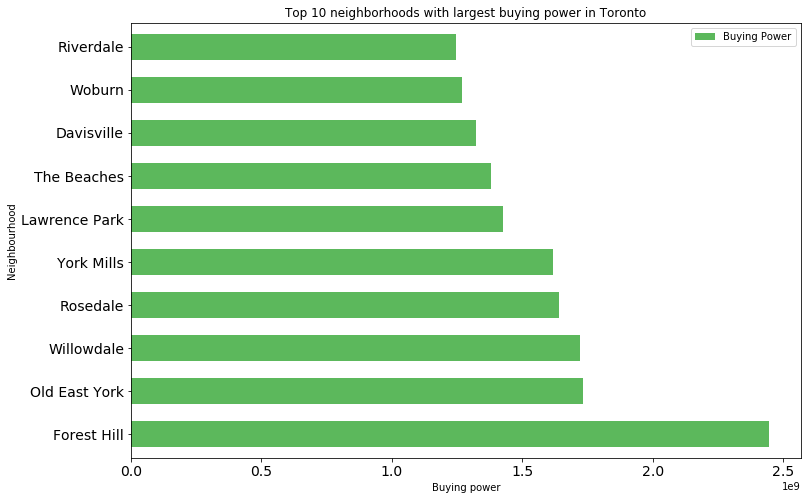

In [88]:
BP_chart = df1[['Neighbourhood', 'Buying Power']].copy().sort_values('Buying Power', ascending=False)
top_chart = BP_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Buying power') # add y-label to the plot
plt.title('Top 10 neighborhoods with largest buying power in Toronto') # add title to the plot

plt.show()

## Importing location data

This is done with geocoder. However, geocoder does have a not always work. therefore, we also have all the information copied .

In [0]:
df1['Latitude'] = ''
df1['Longitude'] = ''

In [16]:
# loop through the postal code to find out the latitude and longitude
geolocator = Nominatim()
for index, data in df1.iterrows():
    loc = None
    print ('Now at Neighbourhood:', data['Neighbourhood'])
    geolocator = Nominatim()
    while(loc is None):
      city ="Toronto"
      region ="Ontario"
      country = 'Canada'
      neigh = data['Neighbourhood']
      loc = geolocator.geocode(neigh+','+city+','+ region+','+country)
      if loc == None:
        loc = geolocator.geocode(neigh+','+city+','+ region)
      if loc == None:
        loc = geolocator.geocode(neigh+','+city+','+','+country)
        
    data['Latitude'] = loc.latitude
    data['Longitude'] = loc.longitude
    print ('Neighbourhood:', data['Neighbourhood'], 'Latitude:', data['Latitude'], 'Longitude:', data['Longitude'])
    


 

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Now at Neighbourhood: Agincourt
Neighbourhood: Agincourt Latitude: 43.7853531 Longitude: -79.2785494
Now at Neighbourhood: Alderwood
Neighbourhood: Alderwood Latitude: 43.6017173 Longitude: -79.5452325
Now at Neighbourhood: Alexandra Park
Neighbourhood: Alexandra Park Latitude: 43.65075755 Longitude: -79.4042978683821
Now at Neighbourhood: Allenby
Neighbourhood: Allenby Latitude: 43.7113509 Longitude: -79.5534236
Now at Neighbourhood: Amesbury
Neighbourhood: Amesbury Latitude: 43.7061619 Longitude: -79.4834918540464
Now at Neighbourhood: Armour Heights
Neighbourhood: Armour Heights Latitude: 43.7439436 Longitude: -79.4308512
Now at Neighbourhood: Banbury
Neighbourhood: Banbury Latitude: 43.7427961 Longitude: -79.3699566407258
Now at Neighbourhood: Bathurst Manor
Neighbourhood: Bathurst Manor Latitude: 43.76389295 Longitude: -79.4563669371095
Now at Neighbourhood: Bay Street Corridor
Neighbourhood: Bay Street Corridor Latitude: 43.6642864 Longitude: -79.3871138
Now at Neighbourhood: Bay

KeyboardInterrupt: ignored

In [17]:
df1.head()

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power
1,Agincourt,44577,12.45,3580,4.6,25750.0,Cantonese (19.3%),19.3% Cantonese,70327.0
2,Alderwood,11656,4.94,2360,-4.0,35239.0,Polish (6.2%),06.2% Polish,46895.0
3,Alexandra Park,4355,0.32,"13,609",0.0,19687.0,Cantonese (17.9%),17.9% Cantonese,24042.0
4,Allenby,2513,0.58,4333,-1.0,245592.0,Russian (1.4%),01.4% Russian,248105.0
5,Amesbury,17318,3.51,"4,934",1.1,27546.0,Spanish (6.1%),06.1% Spanish,44864.0


In [0]:
#Manual update if geocoder does not work 
df1.loc[df1['Neighbourhood'] == 'Agincourt', ['Latitude','Longitude']] = 43.788009 ,-79.283882
df1.loc[df1['Neighbourhood'] == 'Alderwood', ['Latitude','Longitude']] = 43.6035413 ,-79.5464093
df1.loc[df1['Neighbourhood'] == 'Alexandra Park', ['Latitude','Longitude']] = 43.6497781 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Allenby', ['Latitude','Longitude']] = 43.7077457 ,-79.41271429999999
df1.loc[df1['Neighbourhood'] == 'Amesbury', ['Latitude','Longitude']] = 43.7010934 ,-79.48100649999999
df1.loc[df1['Neighbourhood'] == 'Armour Heights', ['Latitude','Longitude']] = 43.7453882 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Banbury', ['Latitude','Longitude']] = 43.7491152 ,-79.3663593
df1.loc[df1['Neighbourhood'] == 'Bathurst Manor', ['Latitude','Longitude']] = 43.7627405 ,-79.45632499999999
df1.loc[df1['Neighbourhood'] == 'Bay Street Corridor', ['Latitude','Longitude']] = 43.6567308 ,-79.3834603
df1.loc[df1['Neighbourhood'] == 'Bayview Village', ['Latitude','Longitude']] = 43.778243 ,-79.3827578
df1.loc[df1['Neighbourhood'] == 'Bayview Woods – Steeles', ['Latitude','Longitude']] = 43.7964111 ,-79.385975
df1.loc[df1['Neighbourhood'] == 'Bedford Park', ['Latitude','Longitude']] = 43.7301254 ,-79.4113072
df1.loc[df1['Neighbourhood'] == 'Bendale', ['Latitude','Longitude']] = 43.765434 ,-79.248935
df1.loc[df1['Neighbourhood'] == 'Birch Cliff', ['Latitude','Longitude']] = 43.6875 ,-79.269444
df1.loc[df1['Neighbourhood'] == 'Bloor West Village', ['Latitude','Longitude']] = 43.6508634 ,-79.477651
df1.loc[df1['Neighbourhood'] == 'Bracondale Hill', ['Latitude','Longitude']] = 43.678237 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Branson', ['Latitude','Longitude']] = 43.7764213 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Bridle Path', ['Latitude','Longitude']] = 43.7359565 ,-79.3692959
df1.loc[df1['Neighbourhood'] == 'Brockton', ['Latitude','Longitude']] = 43.6531909 ,-79.4380391
df1.loc[df1['Neighbourhood'] == 'Cabbagetown', ['Latitude','Longitude']] = 43.667263 ,-79.369169
df1.loc[df1['Neighbourhood'] == 'Caribou Park', ['Latitude','Longitude']] = 43.7182757 ,-79.4239707
df1.loc[df1['Neighbourhood'] == 'Carleton Village', ['Latitude','Longitude']] = 43.6716304 ,-79.4577314
df1.loc[df1['Neighbourhood'] == 'Casa Loma', ['Latitude','Longitude']] = 43.6780371 ,-79.4094439
df1.loc[df1['Neighbourhood'] == 'Centennial', ['Latitude','Longitude']] = 43.7841614 ,-79.1493545
df1.loc[df1['Neighbourhood'] == 'Chaplin Estates', ['Latitude','Longitude']] = 43.7019536 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Christie Pits', ['Latitude','Longitude']] = 43.6645888 ,-79.4206809
df1.loc[df1['Neighbourhood'] == 'Church and Wellesley', ['Latitude','Longitude']] = 43.6645421 ,-79.3817523
df1.loc[df1['Neighbourhood'] == 'Clairville', ['Latitude','Longitude']] = 43.7425044 ,-79.62213679999999
df1.loc[df1['Neighbourhood'] == 'Clairlea', ['Latitude','Longitude']] = 43.7184961 ,-79.2914268
df1.loc[df1['Neighbourhood'] == 'Cliffcrest', ['Latitude','Longitude']] = 43.724917 ,-79.22632899999999
df1.loc[df1['Neighbourhood'] == 'Cliffside', ['Latitude','Longitude']] = 43.712217 ,-79.244001
df1.loc[df1['Neighbourhood'] == 'Corktown', ['Latitude','Longitude']] = 43.654787 ,-79.359932
df1.loc[df1['Neighbourhood'] == 'Crescent Town', ['Latitude','Longitude']] = 43.6959813 ,-79.2937357
df1.loc[df1['Neighbourhood'] == 'Cricket Club', ['Latitude','Longitude']] = 43.7385478 ,-79.41271429999999
df1.loc[df1['Neighbourhood'] == 'Davenport', ['Latitude','Longitude']] = 43.6719082 ,-79.4352256
df1.loc[df1['Neighbourhood'] == 'Davisville', ['Latitude','Longitude']] = 43.70430899999999 ,-79.388516
df1.loc[df1['Neighbourhood'] == 'Deer Park', ['Latitude','Longitude']] = 43.6898373 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Discovery District', ['Latitude','Longitude']] = 43.6603242 ,-79.3937162
df1.loc[df1['Neighbourhood'] == 'Distillery District/West Don Lands', ['Latitude','Longitude']] = 43.6529534 ,-79.3570685
df1.loc[df1['Neighbourhood'] == 'Don Mills', ['Latitude','Longitude']] = 43.7448473 ,-79.34092299999999
df1.loc[df1['Neighbourhood'] == 'Don Valley Village', ['Latitude','Longitude']] = 43.7837792 ,-79.352188
df1.loc[df1['Neighbourhood'] == 'Dorset Park', ['Latitude','Longitude']] = 43.7540011 ,-79.28211739999999
df1.loc[df1['Neighbourhood'] == 'Dovercourt Park', ['Latitude','Longitude']] = 43.6658469 ,-79.4338188
df1.loc[df1['Neighbourhood'] == 'Downsview', ['Latitude','Longitude']] = 43.732256 ,-79.49338499999999
df1.loc[df1['Neighbourhood'] == 'Dufferin Grove', ['Latitude','Longitude']] = 43.6558326 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Earlscourt', ['Latitude','Longitude']] = 43.6769064 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'East Danforth', ['Latitude','Longitude']] = 43.6837565 ,-79.3212058
df1.loc[df1['Neighbourhood'] == 'Eatonville', ['Latitude','Longitude']] = 43.641448 ,-79.5547244
df1.loc[df1['Neighbourhood'] == 'Eglinton East', ['Latitude','Longitude']] = 43.7248346 ,-79.3051242
df1.loc[df1['Neighbourhood'] == 'Elia (Jane and Finch)', ['Latitude','Longitude']] = 43.7511187 ,-79.50975489999999
df1.loc[df1['Neighbourhood'] == 'Eringate', ['Latitude','Longitude']] = 43.66250369999999 ,-79.5772008
df1.loc[df1['Neighbourhood'] == 'Fairbank', ['Latitude','Longitude']] = 43.69640039999999 ,-79.45632499999999
df1.loc[df1['Neighbourhood'] == 'Fashion District', ['Latitude','Longitude']] = 43.644769 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Financial District', ['Latitude','Longitude']] = 43.64793479999999 ,-79.3817523
df1.loc[df1['Neighbourhood'] == 'Flemingdon Park', ['Latitude','Longitude']] = 43.720507 ,-79.33877799999999
df1.loc[df1['Neighbourhood'] == 'Forest Hill', ['Latitude','Longitude']] = 43.70431800000001 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Fort York/Liberty Village', ['Latitude','Longitude']] = 43.6388363 ,-79.4003053
df1.loc[df1['Neighbourhood'] == 'Garden District', ['Latitude','Longitude']] = 43.656898 ,-79.37612179999999
df1.loc[df1['Neighbourhood'] == 'Glen Park', ['Latitude','Longitude']] = 43.7101005 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Governor\'s Bridge/Bennington Heights', ['Latitude','Longitude']] = 43.693193 ,-79.37223809999999
df1.loc[df1['Neighbourhood'] == 'Grange Park', ['Latitude','Longitude']] = 43.6537341 ,-79.3930124
df1.loc[df1['Neighbourhood'] == 'Graydon Hall', ['Latitude','Longitude']] = 43.7616852 ,-79.34373939999999
df1.loc[df1['Neighbourhood'] == 'Guildwood', ['Latitude','Longitude']] = 43.752743 ,-79.19277699999999
df1.loc[df1['Neighbourhood'] == 'Harbord Village', ['Latitude','Longitude']] = 43.66190400000001 ,-79.4042712
df1.loc[df1['Neighbourhood'] == 'Harbourfront / CityPlace', ['Latitude','Longitude']] = 43.6416061 ,-79.3901975
df1.loc[df1['Neighbourhood'] == 'Harwood', ['Latitude','Longitude']] = 43.6758308 ,-79.4774195
df1.loc[df1['Neighbourhood'] == 'Henry Farm', ['Latitude','Longitude']] = 43.77178199999999 ,-79.352086
df1.loc[df1['Neighbourhood'] == 'High Park North', ['Latitude','Longitude']] = 43.6594968 ,-79.467576
df1.loc[df1['Neighbourhood'] == 'Highland Creek', ['Latitude','Longitude']] = 43.78658 ,-79.18829199999999
df1.loc[df1['Neighbourhood'] == 'Hillcrest', ['Latitude','Longitude']] = 43.678237 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Hoggs Hollow', ['Latitude','Longitude']] = 43.7419701 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Humber Bay Shores', ['Latitude','Longitude']] = 43.6259939 ,-79.4774195
df1.loc[df1['Neighbourhood'] == 'Humber Heights', ['Latitude','Longitude']] = 43.6963578 ,-79.527033
df1.loc[df1['Neighbourhood'] == 'Humber Summit', ['Latitude','Longitude']] = 43.7601003 ,-79.5717846
df1.loc[df1['Neighbourhood'] == 'Humber Valley Village', ['Latitude','Longitude']] = 43.667113 ,-79.527974
df1.loc[df1['Neighbourhood'] == 'Humberlea', ['Latitude','Longitude']] = 43.721319 ,-79.5332169
df1.loc[df1['Neighbourhood'] == 'Humbermede', ['Latitude','Longitude']] = 43.7421301 ,-79.5406738
df1.loc[df1['Neighbourhood'] == 'Humberwood', ['Latitude','Longitude']] = 43.7256585 ,-79.619329
df1.loc[df1['Neighbourhood'] == 'Humewood–Cedarvale', ['Latitude','Longitude']] = 43.6937813 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Ionview', ['Latitude','Longitude']] = 43.730824 ,-79.2739
df1.loc[df1['Neighbourhood'] == 'Islington – Six Points', ['Latitude','Longitude']] = 43.6467566 ,-79.53505299999999
df1.loc[df1['Neighbourhood'] == 'Junction Triangle', ['Latitude','Longitude']] = 43.6613564 ,-79.4492924
df1.loc[df1['Neighbourhood'] == 'Kensington Market', ['Latitude','Longitude']] = 43.6545236 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Kingsview Village', ['Latitude','Longitude']] = 43.7005039 ,-79.5519144
df1.loc[df1['Neighbourhood'] == 'Lambton', ['Latitude','Longitude']] = 43.6673705 ,-79.5013207
df1.loc[df1['Neighbourhood'] == 'L\'Amoreaux', ['Latitude','Longitude']] = 43.796 ,-79.309
df1.loc[df1['Neighbourhood'] == 'Lansing', ['Latitude','Longitude']] = 43.7595964 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Lawrence Heights', ['Latitude','Longitude']] = 43.72277400000001 ,-79.45092799999999
df1.loc[df1['Neighbourhood'] == 'Lawrence Manor', ['Latitude','Longitude']] = 43.7280111 ,-79.4394459
df1.loc[df1['Neighbourhood'] == 'Lawrence Park', ['Latitude','Longitude']] = 43.7232822 ,-79.3887901
df1.loc[df1['Neighbourhood'] == 'Leaside', ['Latitude','Longitude']] = 43.70882599999999 ,-79.373499
df1.loc[df1['Neighbourhood'] == 'Ledbury Park', ['Latitude','Longitude']] = 43.731176 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Leslieville', ['Latitude','Longitude']] = 43.6658467 ,-79.33247329999999
df1.loc[df1['Neighbourhood'] == 'Little Italy', ['Latitude','Longitude']] = 43.6547828 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Little Portugal', ['Latitude','Longitude']] = 43.6463408 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Long Branch', ['Latitude','Longitude']] = 43.593421 ,-79.538164
df1.loc[df1['Neighbourhood'] == 'Lytton Park', ['Latitude','Longitude']] = 43.7159091 ,-79.4113072
df1.loc[df1['Neighbourhood'] == 'Malvern', ['Latitude','Longitude']] = 43.80916 ,-79.22169
df1.loc[df1['Neighbourhood'] == 'Maple Leaf', ['Latitude','Longitude']] = 43.7137562 ,-79.49007379999999
df1.loc[df1['Neighbourhood'] == 'Markland Wood', ['Latitude','Longitude']] = 43.632036 ,-79.57513999999999
df1.loc[df1['Neighbourhood'] == 'Maryvale', ['Latitude','Longitude']] = 43.762575 ,-79.314767
df1.loc[df1['Neighbourhood'] == 'Milliken', ['Latitude','Longitude']] = 43.8237331 ,-79.3070855
df1.loc[df1['Neighbourhood'] == 'Mimico', ['Latitude','Longitude']] = 43.614627 ,-79.4956974
df1.loc[df1['Neighbourhood'] == 'Moore Park', ['Latitude','Longitude']] = 43.6913089 ,-79.383686
df1.loc[df1['Neighbourhood'] == 'Morningside', ['Latitude','Longitude']] = 43.787 ,-79.206
df1.loc[df1['Neighbourhood'] == 'Mount Dennis', ['Latitude','Longitude']] = 43.687076 ,-79.48983299999999
df1.loc[df1['Neighbourhood'] == 'New Toronto', ['Latitude','Longitude']] = 43.6007776 ,-79.505257
df1.loc[df1['Neighbourhood'] == 'Newtonbrook', ['Latitude','Longitude']] = 43.790104 ,-79.4197497
df1.loc[df1['Neighbourhood'] == 'Niagara', ['Latitude','Longitude']] = 43.6373829 ,-79.40849279999999
df1.loc[df1['Neighbourhood'] == 'North York City Centre', ['Latitude','Longitude']] = 43.76830349999999 ,-79.4133325
df1.loc[df1['Neighbourhood'] == 'Oakridge', ['Latitude','Longitude']] = 43.696632 ,-79.282859
df1.loc[df1['Neighbourhood'] == 'O\'Connor–Parkview', ['Latitude','Longitude']] = 43.7063972 ,-79.30993699999999
df1.loc[df1['Neighbourhood'] == 'Old East York', ['Latitude','Longitude']] = 43.6964049 ,-79.3296565
df1.loc[df1['Neighbourhood'] == 'Old Mill/Baby Point', ['Latitude','Longitude']] = 43.6581547 ,-79.4914798
df1.loc[df1['Neighbourhood'] == 'Parkdale', ['Latitude','Longitude']] = 43.643832 ,-79.442534
df1.loc[df1['Neighbourhood'] == 'Parkway Forest', ['Latitude','Longitude']] = 43.7722041 ,-79.34233119999999
df1.loc[df1['Neighbourhood'] == 'Parkwoods', ['Latitude','Longitude']] = 43.7553609 ,-79.3268397
df1.loc[df1['Neighbourhood'] == 'Pelmo Park', ['Latitude','Longitude']] = 43.7121365 ,-79.5238103
df1.loc[df1['Neighbourhood'] == 'Playter Estates', ['Latitude','Longitude']] = 43.6790323 ,-79.359228
df1.loc[df1['Neighbourhood'] == 'Pleasant View', ['Latitude','Longitude']] = 43.7848218 ,-79.3381065
df1.loc[df1['Neighbourhood'] == 'Port Lands', ['Latitude','Longitude']] = 43.6473987 ,-79.3381065
df1.loc[df1['Neighbourhood'] == 'Port Union', ['Latitude','Longitude']] = 43.7834548 ,-79.149209
df1.loc[df1['Neighbourhood'] == 'Princess Gardens', ['Latitude','Longitude']] = 43.6688924 ,-79.5434841
df1.loc[df1['Neighbourhood'] == 'Regal Heights', ['Latitude','Longitude']] = 43.676652 ,-79.4352256
df1.loc[df1['Neighbourhood'] == 'Regent Park/Trefann Court', ['Latitude','Longitude']] = 43.6574889 ,-79.360284
df1.loc[df1['Neighbourhood'] == 'Richview', ['Latitude','Longitude']] = 43.6878699 ,-79.5434841
df1.loc[df1['Neighbourhood'] == 'Riverdale', ['Latitude','Longitude']] = 43.669714 ,-79.353185
df1.loc[df1['Neighbourhood'] == 'Rockcliffe–Smythe', ['Latitude','Longitude']] = 43.6742272 ,-79.49850909999999
df1.loc[df1['Neighbourhood'] == 'Roncesvalles', ['Latitude','Longitude']] = 43.6484365 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Rosedale', ['Latitude','Longitude']] = 43.683375 ,-79.377172
df1.loc[df1['Neighbourhood'] == 'Rouge', ['Latitude','Longitude']] = 43.804929 ,-79.165842
df1.loc[df1['Neighbourhood'] == 'Rouge Hill', ['Latitude','Longitude']] = 43.794719 ,-79.134478
df1.loc[df1['Neighbourhood'] == 'Runnymede', ['Latitude','Longitude']] = 43.66173240000001 ,-79.4849101
df1.loc[df1['Neighbourhood'] == 'Scarborough Junction', ['Latitude','Longitude']] = 43.71666700000001 ,-79.259722
df1.loc[df1['Neighbourhood'] == 'Scarborough City Centre', ['Latitude','Longitude']] = 43.7762792 ,-79.2529857
df1.loc[df1['Neighbourhood'] == 'Scarborough Village', ['Latitude','Longitude']] = 43.740615 ,-79.208887
df1.loc[df1['Neighbourhood'] == 'Seaton Village', ['Latitude','Longitude']] = 43.669017 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Silverthorn', ['Latitude','Longitude']] = 43.6879613 ,-79.467576
df1.loc[df1['Neighbourhood'] == 'Smithfield', ['Latitude','Longitude']] = 43.7394164 ,-79.58843689999999
df1.loc[df1['Neighbourhood'] == 'South Hill', ['Latitude','Longitude']] = 43.6821959 ,-79.4056784
df1.loc[df1['Neighbourhood'] == 'St. James Town', ['Latitude','Longitude']] = 43.6708666 ,-79.37330639999999
df1.loc[df1['Neighbourhood'] == 'Steeles', ['Latitude','Longitude']] = 43.8155519 ,-79.3107689
df1.loc[df1['Neighbourhood'] == 'Summerhill', ['Latitude','Longitude']] = 43.6811436 ,-79.3944199
df1.loc[df1['Neighbourhood'] == 'Sunnylea', ['Latitude','Longitude']] = 43.6399324 ,-79.5125662
df1.loc[df1['Neighbourhood'] == 'Swansea', ['Latitude','Longitude']] = 43.6439713 ,-79.47799069999999
df1.loc[df1['Neighbourhood'] == 'Tam O\'Shanter – Sullivan', ['Latitude','Longitude']] = 43.788056 ,-79.301389
df1.loc[df1['Neighbourhood'] == 'The Annex', ['Latitude','Longitude']] = 43.6698329 ,-79.407585
df1.loc[df1['Neighbourhood'] == 'The Beaches', ['Latitude','Longitude']] = 43.6673479 ,-79.29669299999999
df1.loc[df1['Neighbourhood'] == 'The Danforth', ['Latitude','Longitude']] = 43.6837565 ,-79.3212058
df1.loc[df1['Neighbourhood'] == 'The Elms', ['Latitude','Longitude']] = 43.7236919 ,-79.5462943
df1.loc[df1['Neighbourhood'] == 'The Junction', ['Latitude','Longitude']] = 43.666612 ,-79.468614
df1.loc[df1['Neighbourhood'] == 'The Kingsway', ['Latitude','Longitude']] = 43.652674 ,-79.507194
df1.loc[df1['Neighbourhood'] == 'The Queensway', ['Latitude','Longitude']] = 43.6254023 ,-79.5068881
df1.loc[df1['Neighbourhood'] == 'Thistletown', ['Latitude','Longitude']] = 43.73717449999999 ,-79.5652707
df1.loc[df1['Neighbourhood'] == 'Thorncliffe Park', ['Latitude','Longitude']] = 43.7080032 ,-79.352188
df1.loc[df1['Neighbourhood'] == 'Toronto Islands', ['Latitude','Longitude']] = 43.621413 ,-79.3788412
df1.loc[df1['Neighbourhood'] == 'Trinity–Bellwoods', ['Latitude','Longitude']] = 43.6500371 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Upper Beaches', ['Latitude','Longitude']] = 43.6779526 ,-79.30993699999999
df1.loc[df1['Neighbourhood'] == 'Victoria Village', ['Latitude','Longitude']] = 43.7357352 ,-79.3124184
df1.loc[df1['Neighbourhood'] == 'Wallace Emerson', ['Latitude','Longitude']] = 43.6684011 ,-79.4405951
df1.loc[df1['Neighbourhood'] == 'West Deane Park', ['Latitude','Longitude']] = 43.6635853 ,-79.5631537
df1.loc[df1['Neighbourhood'] == 'West Hill', ['Latitude','Longitude']] = 43.769163 ,-79.182803
df1.loc[df1['Neighbourhood'] == 'West Rouge', ['Latitude','Longitude']] = 43.794719 ,-79.134478
df1.loc[df1['Neighbourhood'] == 'Westminster', ['Latitude','Longitude']] = 43.7764213 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Westmount', ['Latitude','Longitude']] = 43.6871106 ,-79.52240479999999
df1.loc[df1['Neighbourhood'] == 'Weston', ['Latitude','Longitude']] = 43.7002318 ,-79.51507810000001
df1.loc[df1['Neighbourhood'] == 'Wexford', ['Latitude','Longitude']] = 43.74320789999999 ,-79.3046444
df1.loc[df1['Neighbourhood'] == 'Willowdale', ['Latitude','Longitude']] = 43.7711708 ,-79.4197497
df1.loc[df1['Neighbourhood'] == 'Wilson Heights', ['Latitude','Longitude']] = 43.74069799999999 ,-79.438824
df1.loc[df1['Neighbourhood'] == 'Woburn', ['Latitude','Longitude']] = 43.767528 ,-79.21772100000001
df1.loc[df1['Neighbourhood'] == 'Wychwood', ['Latitude','Longitude']] = 43.6779102 ,-79.4201015
df1.loc[df1['Neighbourhood'] == 'York Mills', ['Latitude','Longitude']] = 43.7501272 ,-79.39723459999999
df1.loc[df1['Neighbourhood'] == 'York University Heights', ['Latitude','Longitude']] = 43.7679803 ,-79.4872619
df1.loc[df1['Neighbourhood'] == 'Yorkville', ['Latitude','Longitude']] = 43.670749 ,-79.39304

## Cluster the neigborhoods

In [91]:
#Location for toronto
latitude = 43.6532
longitude= -79.3832

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6532, -79.3832.


In [92]:
#create a map over toronoto with all the neighborhoods
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [93]:
#Foursquare API 
CLIENT_ID = 'PEYB3VAYHHPRWBWZNEFLOEC0FYSFP1BEVGU3NY4IJRIZXA5P' # your Foursquare ID
CLIENT_SECRET = 'FKXW4XBHHWP4GULWTD2ZN0J2FGJL00K4E3D1KSSZMKTTCYIW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PEYB3VAYHHPRWBWZNEFLOEC0FYSFP1BEVGU3NY4IJRIZXA5P
CLIENT_SECRET:FKXW4XBHHWP4GULWTD2ZN0J2FGJL00K4E3D1KSSZMKTTCYIW


In [0]:
#get all the nearby venues through foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=500,limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
toronto_venues = getNearbyVenues(names=df1['Neighbourhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude'],
                                  )

Agincourt
Alderwood
Alexandra Park
Allenby
Amesbury
Armour Heights
Banbury
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods – Steeles
Bedford Park
Bendale
Birch Cliff
Bloor West Village
Bracondale Hill
Branson
Bridle Path
Brockton
Cabbagetown
Caribou Park
Carleton Village
Casa Loma
Centennial
Chaplin Estates
Christie Pits
Church and Wellesley
Clairville
Clairlea
Cliffcrest
Cliffside
Corktown
Crescent Town
Cricket Club
Davenport
Davisville
Deer Park
Discovery District
Distillery District/West Don Lands
Don Mills
Don Valley Village
Dorset Park
Dovercourt Park
Downsview
Dufferin Grove
Earlscourt
East Danforth
Eatonville
Eglinton East
Elia (Jane and Finch)
Eringate
Fairbank
Fashion District
Financial District
Flemingdon Park
Forest Hill
Fort York/Liberty Village
Garden District
Glen Park
Governor's Bridge/Bennington Heights
Grange Park
Graydon Hall
Guildwood
Harbord Village
Harbourfront / CityPlace
Harwood
Henry Farm
High Park North
Highland Creek
Hillcrest
Hoggs Hollow
Hum

In [96]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,...,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,...,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00
1,Alderwood,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00
2,Alexandra Park,0.020000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.01,0.000000,0.00,0.020000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.060000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.00,0.0,0.0,0.010000,0.0,0.00,0.000000,0.010000,0.000000,0.0,0.000000,0.02,0.0,0.000000,0.0,0.0,0.000,0.0,0.01,0.0,0.050000,0.010000,0.000000,0.010000,0.0,0.000000,0.0,0.010000,0.0,0.000000,0.00
3,Allenby,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.043478,0.0,0.0,0.000000,0.0,0.043478,0.043478,0.043478,0.000000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.00,0.0,0.0,0.043478,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00
4,Amesbury,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00
5,Arm

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [99]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Coffee Shop,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
1,Alderwood,Pizza Place,Coffee Shop,Convenience Store,Pool,Donut Shop,Skating Rink,Pub,Pharmacy,Dance Studio,Gym
2,Alexandra Park,Café,Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,French Restaurant,Dessert Shop,Caribbean Restaurant,Yoga Studio,Indian Restaurant
3,Allenby,Italian Restaurant,Coffee Shop,Deli / Bodega,Sushi Restaurant,Asian Restaurant,Café,Gastropub,Liquor Store,Clothing Store,Tea Room
4,Amesbury,Portuguese Restaurant,Restaurant,Park,Fast Food Restaurant,Field,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant


## Cluster the neighborhoods

This is done with kmeans.

In [100]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:-1] 

array([3, 1, 1, 1, 4, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 2, 4,
       1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 4, 1, 4, 1, 1, 0, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 4, 1, 2, 0, 1, 1, 4, 1, 4, 1, 0, 4, 0, 1, 1, 4,
       4, 1, 4, 1, 0, 1, 0, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 4, 1, 0, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1], dtype=int32)

In [101]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Agincourt,44577,12.45,3580,4.6,25750.0,Cantonese (19.3%),19.3% Cantonese,1.147858e+09,43.788,-79.2839,3.0,Coffee Shop,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
2,Alderwood,11656,4.94,2360,-4.0,35239.0,Polish (6.2%),06.2% Polish,4.107458e+08,43.6035,-79.5464,1.0,Pizza Place,Coffee Shop,Convenience Store,Pool,Donut Shop,Skating Rink,Pub,Pharmacy,Dance Studio,Gym
3,Alexandra Park,4355,0.32,"13,609",0.0,19687.0,Cantonese (17.9%),17.9% Cantonese,8.573688e+07,43.6498,-79.4015,1.0,Café,Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,French Restaurant,Dessert Shop,Caribbean Restaurant,Yoga Studio,Indian Restaurant
4,Allenby,2513,0.58,4333,-1.0,245592.0,Russian (1.4%),01.4% Russian,6.171727e+08,43.7077,-79.4127,1.0,Italian Restaurant,Coffee Shop,Deli / Bodega,Sushi Restaurant,Asian Restaurant,Café,Gastropub,Liquor Store,Clothing Store,Tea Room
5,Amesbury,17318,3.51,"4,934",1.1,27546.0,Spanish (6.1%),06.1% Spanish,4.770416e+08,43.7011,-79.481,4.0,Portuguese Restaurant,Restaurant,Park,Fast Food Restaurant,Field,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [0]:
toronto_merged.dropna(inplace=True)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [103]:
# create map
import matplotlib.colors as colors

map_clusters =folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [104]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Agincourt,Coffee Shop,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
1,1,Alderwood,Pizza Place,Coffee Shop,Convenience Store,Pool,Donut Shop,Skating Rink,Pub,Pharmacy,Dance Studio,Gym
2,1,Alexandra Park,Café,Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,French Restaurant,Dessert Shop,Caribbean Restaurant,Yoga Studio,Indian Restaurant
3,1,Allenby,Italian Restaurant,Coffee Shop,Deli / Bodega,Sushi Restaurant,Asian Restaurant,Café,Gastropub,Liquor Store,Clothing Store,Tea Room
4,4,Amesbury,Portuguese Restaurant,Restaurant,Park,Fast Food Restaurant,Field,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
5,1,Armour Heights,Wine Shop,Women's Store,Filipino Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
6,2,Banbury,Park,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
7,0,Bathurst Manor,Baseball Field,Convenience Store,Playground,Park,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
8,1,Bay Street Corridor,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Tea Room,Café,Restaurant,Ramen Restaurant,Chinese Restaurant,Plaza
9,1,Bayview Village,Trail,Flower Shop,Women's Store,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant


## Analysis of clusters 

In [141]:
# Cluster 0 
cluster0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Buying Power', ascending=False).head(5)

,Neighbourhood,Population,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
130,Rosedale,7672,213941.0,Unspecified Chinese (1.0%),01.0% Unspecified Chinese,1.641355e+09,43.6834,-79.3772,0,Grocery Store,Playground,Bank,Gym / Fitness Center,Park,Candy Store,Farmers Market,Elementary School,Empanada Restaurant,Ethiopian Restaurant
97,Lytton Park,6494,127356.0,Serbian (0.9%),00.9% Serbian,8.270499e+08,43.7159,-79.4113,0,Playground,Garden,Restaurant,Women's Store,Field,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
140,South Hill,6218,120453.0,French (1.0%),01.0% French,7.489768e+08,43.6822,-79.4057,0,History Museum,Playground,Construction & Landscaping,Park,Cocktail Bar,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
123,Princess Gardens,9288,80607.0,Korean (2.4%),02.4% Korean,7.486778e+08,43.6689,-79.5435,0,Playground,Women's Store,Filipino Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
104,Moore Park,4474,154825.0,French (1.1%),01.1% French,6.926870e+08,43.6913,-79.3837,0,Convenience Store,Playground,Tennis Court,Gym,Cuban Restaurant,Cupcake Shop,Empanada Restaurant,Creperie,Ethiopian Restaurant,Event Space


In [142]:
#cluster 1
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Buying Power', ascending=False).head(5)

,Neighbourhood,Population,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Forest Hill,24056,101631.0,Russian (2.4%),02.4% Russian,2.444835e+09,43.7043,-79.4268,1,Pizza Place,Optical Shop,Trail,Spa,Breakfast Spot,Frozen Yogurt Shop,Sushi Restaurant,Gift Shop,Korean Restaurant,Bank
113,Old East York,52220,33172.0,Greek (4.3%),04.3% Greek,1.732242e+09,43.6964,-79.3297,1,Thai Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Bus Line,Ice Cream Shop,Greek Restaurant,Pub,Pastry Shop,Park
168,Willowdale,43144,39895.0,Cantonese (7.9%),07.9% Cantonese,1.721230e+09,43.7712,-79.4197,1,Pet Store,Restaurant,Women's Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
148,The Beaches,20416,67536.0,Cantonese (0.7%),00.7% Cantonese,1.378815e+09,43.6673,-79.2967,1,Beach,Park,Thai Restaurant,Japanese Restaurant,Tea Room,Sandwich Place,Coffee Shop,Pizza Place,Bar,Bakery
36,Davisville,23727,55735.0,Persian (1.5%),01.5% Persian,1.322424e+09,43.7043,-79.3885,1,Pizza Place,Dessert Shop,Sandwich Place,Thai Restaurant,Restaurant,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Discount Store


In [143]:
#cluster 2
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Buying Power', ascending=False).head(5)

,Neighbourhood,Population,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Banbury,6641,92319.0,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,613090479.0,43.7491,-79.3664,2,Park,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
122,Port Union,12450,48117.0,Filipino (1.6%),01.6% Filipino,599056650.0,43.7835,-79.1492,2,Park,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
24,Centennial,12565,34867.0,Polish (2.7%),02.7% Polish,438103855.0,43.7842,-79.1494,2,Park,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
67,Henry Farm,2790,56395.0,Mandarin (3.9%),03.9% Mandarin,157342050.0,43.7718,-79.3521,2,Park,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field


In [144]:
#cluster 3
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Buying Power', ascending=False).head(5)

,Neighbourhood,Population,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Agincourt,44577,25750.0,Cantonese (19.3%),19.3% Cantonese,1.147858e+09,43.788,-79.2839,3,Coffee Shop,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
80,Ionview,13025,25078.0,Filipino (6.5%),06.5% Filipino,3.266410e+08,43.7308,-79.2739,3,Coffee Shop,Chinese Restaurant,Sandwich Place,Women's Store,Fast Food Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [145]:
#cluster 4
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Buying Power', ascending=False).head(5)

,Neighbourhood,Population,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
172,York Mills,17564,92099.0,Korean (4.0%),04.0% Korean,1.617627e+09,43.7501,-79.3972,4,Convenience Store,Park,Bank,Women's Store,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
170,Woburn,48507,26190.0,Gujarati (9.1%),09.1% Gujarati,1.270398e+09,43.7675,-79.2177,4,Korean Restaurant,Park,Coffee Shop,Business Service,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
75,Humber Valley Village,14453,80618.0,Ukrainian (3.9%),03.9% Ukrainian,1.165172e+09,43.6671,-79.528,4,Park,Baseball Field,Skating Rink,Women's Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
50,Elia (Jane and Finch),48003,22691.0,Vietnamese (6.9%),06.9% Vietnamese,1.089236e+09,43.7511,-79.5098,4,Plaza,Pool,Park,Soccer Field,Farmers Market,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space
68,High Park North,22746,46437.0,Polish (3.0%),03.0% Polish,1.056256e+09,43.6595,-79.4676,4,Park,Convenience Store,Italian Restaurant,Café,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market


### Analysing the sum of total buying power in each cluster

In [0]:
#sum the information about hte entire cluster
c0sum= cluster0[['Population','Income','Buying Power']].sum()
c1sum= cluster1[['Population','Income','Buying Power']].sum() 
c2sum= cluster2[['Population','Income','Buying Power']].sum()
c3sum= cluster3[['Population','Income','Buying Power']].sum() 
c4sum= cluster4[['Population','Income','Buying Power']].sum() 
#should be one row per cluster 
cluster_summary = pd.concat([c1sum,c2sum,c3sum,c4sum,c5sum])

In [148]:
c1sum

Population      1.679089e+06
Income          5.375666e+06
Buying Power    6.522200e+10
dtype: float64

In [0]:
c0sum = pd.DataFrame(c0sum,['Population','Income','Buying Power']).transpose()
c1sum = pd.DataFrame(c1sum,['Population','Income','Buying Power']).transpose()
c2sum = pd.DataFrame(c2sum,['Population','Income','Buying Power']).transpose()
c3sum = pd.DataFrame(c3sum,['Population','Income','Buying Power']).transpose()
c4sum = pd.DataFrame(c4sum,['Population','Income','Buying Power']).transpose()

In [0]:

#make it into one df 
cluster_summary = pd.concat([c0sum,c1sum,c2sum,c3sum,c4sum])


In [170]:
cluster_summary.reset_index(inplace=True)
del cluster_summary['index']
cluster_summary.head()

,Population,Income,Buying Power
0,112718.0,895185.0,7.219585e+09
1,1679089.0,5375666.0,6.522200e+10
2,34446.0,231698.0,1.807593e+09
3,57602.0,50828.0,1.474499e+09
4,494781.0,1472788.0,1.809783e+10


In [171]:
print('size of cluster 0: ',cluster0.shape[0])
print('size of cluster 1: ',cluster1.shape[0])
print('size of cluster 2: ',cluster2.shape[0])
print('size of cluster 3: ',cluster3.shape[0])
print('size of cluster 5: ',cluster4.shape[0])

size of cluster 0:  11
size of cluster 1:  121
size of cluster 2:  4
size of cluster 3:  2
size of cluster 5:  33


Cluster 3 and 4 have too few neighborhoods in their clusters and we will therefore exclude them from further analysis.


In [172]:
cluster0.sort_values('Buying Power', inplace=True,ascending = False)
cluster1.sort_values('Buying Power', inplace=True,ascending = False)
cluster4.sort_values('Buying Power', inplace=True,ascending = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
cluster0.head(5)

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
130,Rosedale,7672,2.72,2821,4.8,213941.0,Unspecified Chinese (1.0%),01.0% Unspecified Chinese,1.641355e+09,43.6834,-79.3772,0,Grocery Store,Playground,Bank,Gym / Fitness Center,Park,Candy Store,Farmers Market,Elementary School,Empanada Restaurant,Ethiopian Restaurant
97,Lytton Park,6494,1.28,5073,5.0,127356.0,Serbian (0.9%),00.9% Serbian,8.270499e+08,43.7159,-79.4113,0,Playground,Garden,Restaurant,Women's Store,Field,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
140,South Hill,6218,1.26,4935,-3.8,120453.0,French (1.0%),01.0% French,7.489768e+08,43.6822,-79.4057,0,History Museum,Playground,Construction & Landscaping,Park,Cocktail Bar,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
123,Princess Gardens,9288,4.13,2249,1.0,80607.0,Korean (2.4%),02.4% Korean,7.486778e+08,43.6689,-79.5435,0,Playground,Women's Store,Filipino Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
104,Moore Park,4474,1.13,3959,-2.0,154825.0,French (1.1%),01.1% French,6.926870e+08,43.6913,-79.3837,0,Convenience Store,Playground,Tennis Court,Gym,Cuban Restaurant,Cupcake Shop,Empanada Restaurant,Creperie,Ethiopian Restaurant,Event Space


In [174]:
cluster1.head(5)

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Forest Hill,24056,4.35,5530,-0.2,101631.0,Russian (2.4%),02.4% Russian,2.444835e+09,43.7043,-79.4268,1,Pizza Place,Optical Shop,Trail,Spa,Breakfast Spot,Frozen Yogurt Shop,Sushi Restaurant,Gift Shop,Korean Restaurant,Bank
113,Old East York,52220,7.94,6577,-4.6,33172.0,Greek (4.3%),04.3% Greek,1.732242e+09,43.6964,-79.3297,1,Thai Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Bus Line,Ice Cream Shop,Greek Restaurant,Pub,Pastry Shop,Park
168,Willowdale,43144,7.68,5618,62.3,39895.0,Cantonese (7.9%),07.9% Cantonese,1.721230e+09,43.7712,-79.4197,1,Pet Store,Restaurant,Women's Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
148,The Beaches,20416,3.57,5719,7.8,67536.0,Cantonese (0.7%),00.7% Cantonese,1.378815e+09,43.6673,-79.2967,1,Beach,Park,Thai Restaurant,Japanese Restaurant,Tea Room,Sandwich Place,Coffee Shop,Pizza Place,Bar,Bakery
36,Davisville,23727,3.14,7556,4.5,55735.0,Persian (1.5%),01.5% Persian,1.322424e+09,43.7043,-79.3885,1,Pizza Place,Dessert Shop,Sandwich Place,Thai Restaurant,Restaurant,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Discount Store


In [175]:
cluster4.head(5)

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
172,York Mills,17564,7.29,2409,2.0,92099.0,Korean (4.0%),04.0% Korean,1.617627e+09,43.7501,-79.3972,4,Convenience Store,Park,Bank,Women's Store,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
170,Woburn,48507,13.34,3636,-1.5,26190.0,Gujarati (9.1%),09.1% Gujarati,1.270398e+09,43.7675,-79.2177,4,Korean Restaurant,Park,Coffee Shop,Business Service,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
75,Humber Valley Village,14453,5.45,2652,-0.1,80618.0,Ukrainian (3.9%),03.9% Ukrainian,1.165172e+09,43.6671,-79.528,4,Park,Baseball Field,Skating Rink,Women's Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
50,Elia (Jane and Finch),48003,7.66,6267,-10.0,22691.0,Vietnamese (6.9%),06.9% Vietnamese,1.089236e+09,43.7511,-79.5098,4,Plaza,Pool,Park,Soccer Field,Farmers Market,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space
68,High Park North,22746,2.18,"10,434",-1.6,46437.0,Polish (3.0%),03.0% Polish,1.056256e+09,43.6595,-79.4676,4,Park,Convenience Store,Italian Restaurant,Café,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market


By analzing the three clusters 0,1, and 4 we can see that either cluster 0 or 1 shows the most promise in regards to buying power. Futhermore, clusters 0 greatest buying power is in Rosedal but Rosedal also have a grocery stores to a large extent. 

Therefore Forest Hill in cluster 1 has the best promise. High buying power and low grocery store frequency. Also, cluster 1 has a large amount of similair areas.  

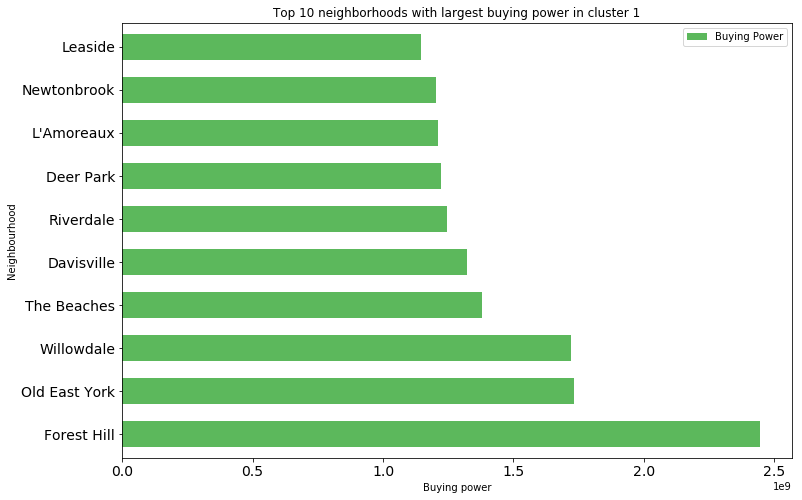

In [176]:
BP_chart = cluster1[['Neighbourhood', 'Buying Power']].copy().sort_values('Buying Power', ascending=False)
top_chart = BP_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Buying power') # add y-label to the plot
plt.title('Top 10 neighborhoods with largest buying power in cluster 1') # add title to the plot

plt.show()

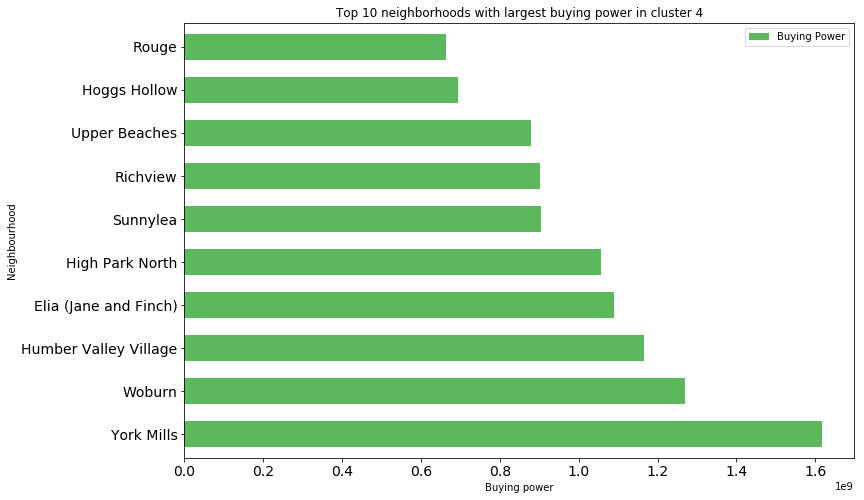

In [177]:
BP_chart = cluster4[['Neighbourhood', 'Buying Power']].copy().sort_values('Buying Power', ascending=False)
top_chart = BP_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Buying power') # add y-label to the plot
plt.title('Top 10 neighborhoods with largest buying power in cluster 4') # add title to the plot

plt.show()

In [0]:
neigh_w_grocery = []
for i in range(0, cluster1.shape[0]):
  has_grocery = (cluster1.iloc[[i]].apply(lambda x: 'Grocery Store' in x.values).any())
  if has_grocery == True:
    neigh_w_grocery.append(i)

In [0]:
cluster1 = cluster1.drop(cluster1.index[has_grocery])

In [180]:
cluster1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Forest Hill,24056,4.35,5530,-0.2,101631.0,Russian (2.4%),02.4% Russian,2.444835e+09,43.7043,-79.4268,1,Pizza Place,Optical Shop,Trail,Spa,Breakfast Spot,Frozen Yogurt Shop,Sushi Restaurant,Gift Shop,Korean Restaurant,Bank
113,Old East York,52220,7.94,6577,-4.6,33172.0,Greek (4.3%),04.3% Greek,1.732242e+09,43.6964,-79.3297,1,Thai Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Bus Line,Ice Cream Shop,Greek Restaurant,Pub,Pastry Shop,Park
168,Willowdale,43144,7.68,5618,62.3,39895.0,Cantonese (7.9%),07.9% Cantonese,1.721230e+09,43.7712,-79.4197,1,Pet Store,Restaurant,Women's Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
148,The Beaches,20416,3.57,5719,7.8,67536.0,Cantonese (0.7%),00.7% Cantonese,1.378815e+09,43.6673,-79.2967,1,Beach,Park,Thai Restaurant,Japanese Restaurant,Tea Room,Sandwich Place,Coffee Shop,Pizza Place,Bar,Bakery
36,Davisville,23727,3.14,7556,4.5,55735.0,Persian (1.5%),01.5% Persian,1.322424e+09,43.7043,-79.3885,1,Pizza Place,Dessert Shop,Sandwich Place,Thai Restaurant,Restaurant,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Discount Store
127,Riverdale,31007,3.99,7771,-5.5,40139.0,Cantonese (6.7%),06.7% Cantonese,1.244590e+09,43.6697,-79.3532,1,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Light Rail Station,Asian Restaurant,Chocolate Shop,Park,Café,Dim Sum Restaurant
37,Deer Park,15165,1.46,"10,387",5.2,80704.0,Russian (1.1%),01.1% Russian,1.223876e+09,43.6898,-79.3986,1,Coffee Shop,Pub,Bagel Shop,Gym,Restaurant,Sushi Restaurant,Pizza Place,Sports Bar,Bookstore,Chiropractor
86,L'Amoreaux,45862,7.15,6414,0.9,26375.0,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,1.209610e+09,43.796,-79.309,1,Chinese Restaurant,Shopping Mall,Caribbean Restaurant,Bus Stop,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
108,Newtonbrook,36046,8.77,4110,0.3,33428.0,Russian (8.8%),08.8% Russian,1.204946e+09,43.7901,-79.4197,1,Coffee Shop,Café,Middle Eastern Restaurant,Korean Restaurant,Pizza Place,Japanese Restaurant,Dessert Shop,Ramen Restaurant,Sandwich Place,Shopping Mall
91,Leaside,13876,2.81,4938,3.0,82670.0,Bulgarian (0.4%),00.4% Bulgarian,1.147129e+09,43.7088,-79.3735,1,Bakery,Coffee Shop,Sushi Restaurant,Asian Restaurant,Thai Restaurant,Indian Restaurant,Baby Store,Bar,Restaurant,Grocery Store


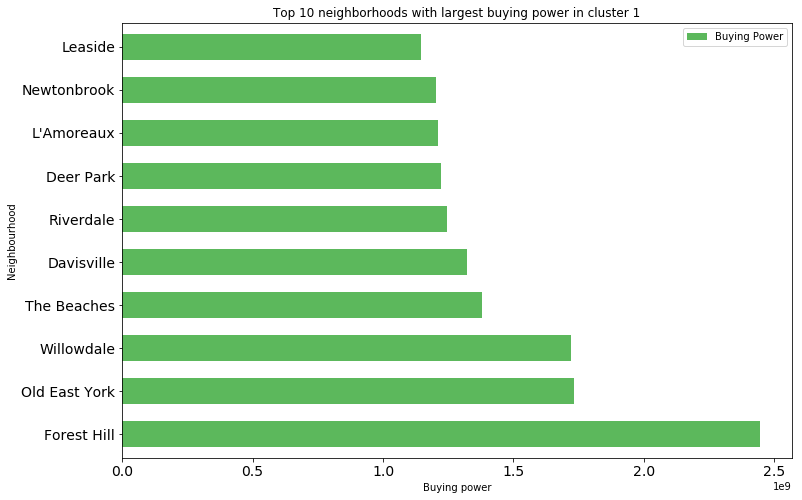

In [181]:
BP_chart = cluster1[['Neighbourhood', 'Buying Power']].copy().sort_values('Buying Power', ascending=False)
top_chart = BP_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Buying power') # add y-label to the plot
plt.title('Top 10 neighborhoods with largest buying power in cluster 1') # add title to the plot

plt.show()

In [182]:
cluster1.iloc[0:10][['Buying Power']].sum()

Buying Power    1.462970e+10
dtype: float64

In [0]:
neigh_w_grocery = []
for i in range(0, cluster4.shape[0]):
  has_grocery = (cluster4.iloc[[i]].apply(lambda x: 'Grocery Store' in x.values).any())
  if has_grocery == True:
    neigh_w_grocery.append(i)

In [0]:
cluster4 = cluster4.drop(cluster5.index[has_grocery])

In [185]:
cluster5.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,2nd Language,2nd Language %,Buying Power,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
172,York Mills,17564,7.29,2409,2.0,92099.0,Korean (4.0%),04.0% Korean,1.617627e+09,43.7501,-79.3972,4,Convenience Store,Park,Bank,Women's Store,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
170,Woburn,48507,13.34,3636,-1.5,26190.0,Gujarati (9.1%),09.1% Gujarati,1.270398e+09,43.7675,-79.2177,4,Korean Restaurant,Park,Coffee Shop,Business Service,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
75,Humber Valley Village,14453,5.45,2652,-0.1,80618.0,Ukrainian (3.9%),03.9% Ukrainian,1.165172e+09,43.6671,-79.528,4,Park,Baseball Field,Skating Rink,Women's Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
50,Elia (Jane and Finch),48003,7.66,6267,-10.0,22691.0,Vietnamese (6.9%),06.9% Vietnamese,1.089236e+09,43.7511,-79.5098,4,Plaza,Pool,Park,Soccer Field,Farmers Market,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space
68,High Park North,22746,2.18,"10,434",-1.6,46437.0,Polish (3.0%),03.0% Polish,1.056256e+09,43.6595,-79.4676,4,Park,Convenience Store,Italian Restaurant,Café,Women's Store,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
144,Sunnylea,17602,5.23,3366,-1.1,51398.0,Polish (5.2%),05.2% Polish,9.047076e+08,43.6399,-79.5126,4,Gym / Fitness Center,Other Great Outdoors,Park,Eastern European Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
126,Richview,26053,6.51,4002,-4.0,34579.0,Italian (4.2%),04.2% Italian,9.008867e+08,43.6879,-79.5435,4,Baseball Field,Park,Intersection,Supplement Shop,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
158,Upper Beaches,19830,2.92,6791,0.5,44346.0,Cantonese (0.7%),00.7% Cantonese,8.793812e+08,43.678,-79.3099,4,Hungarian Restaurant,Café,Flower Shop,Park,Asian Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
71,Hoggs Hollow,3123,2.76,1132,2.0,222560.0,Unspecified Chinese (2.4%),02.4% Unspecified Chinese,6.950549e+08,43.742,-79.3986,4,Speakeasy,Park,Bus Stop,Women's Store,Field,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
131,Rouge,22724,28.72,791,175.0,29230.0,Tamil (15.6%),15.6% Tamil,6.642225e+08,43.8049,-79.1658,4,Park,Fast Food Restaurant,Women's Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Field


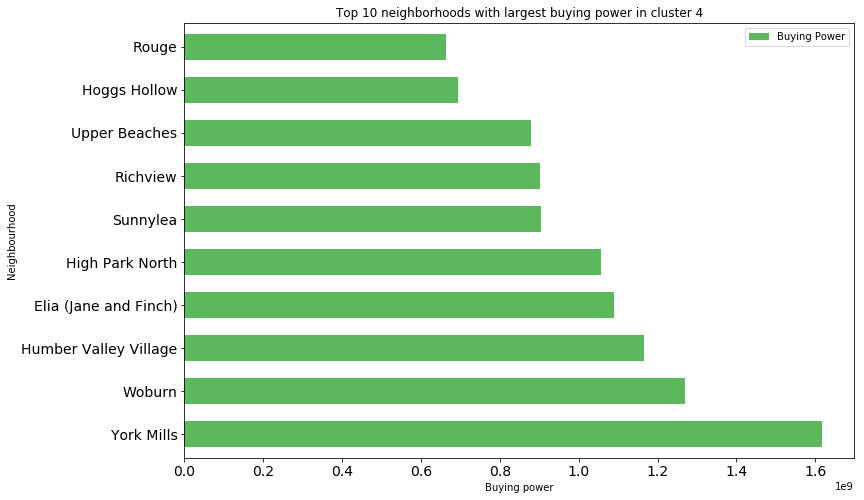

In [186]:
BP_chart = cluster4[['Neighbourhood', 'Buying Power']].copy().sort_values('Buying Power', ascending=False)
top_chart = BP_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='barh', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.ylabel('Neighbourhood') # add to x-label to the plot
plt.xlabel('Buying power') # add y-label to the plot
plt.title('Top 10 neighborhoods with largest buying power in cluster 4') # add title to the plot

plt.show()

In [187]:
cluster4.iloc[0:10][['Buying Power']].sum()

Buying Power    1.024294e+10
dtype: float64

**Conclusion**

Based on the results, it is clear that cluster one is the best one to enter. This is since,there are a large amount of similar neighborhoods that one could expand into, it has the largest buying power, and its neighborhoods are growing in population. 

Within cluster 1, neighborhood Forest Hill has great potential. Since Willowdale is in the top 3 of the greatest buying power within cluster 1, and had a high population growth, BestGrocery should look into expanding there as well.  Further analysis of these two neighborhoods should be conducted, analyzing aspects such as:
Property and rent costs
Labor market 



